# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
#The pandas.core.datetools module is deprecated and will be removed in a future version.
#therfore importing pandas.tseries module
from pandas import datetools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: there are 400 observations in the dataset

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

 Answer: the values we are looking at are diferent, in the hundreds for gre and unit values, between 2 & 4 for gpa, therefore the variation around the mean for observations will be much smaller for gra than for gpa.

#### Question 4. Drop data points with missing data


In [5]:
#drop rows with mising values using dropana() function
df_amend=df_raw.dropna()
df_amend.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: the number of rows in the new dataframe has 397 rows which should be the number of rows excluding those rows with NaN values.  to confirm use isnull() function below and we can see that there are no 'True' entries in the dataframe which means there are no null values in the dataframe.

In [6]:
df_amend.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


#### Question 6. Create box plots for GRE and GPA

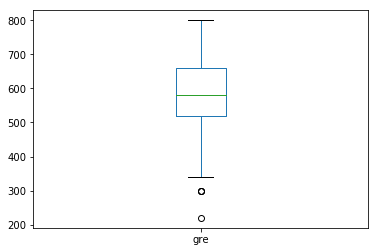

In [7]:
#boxplot 1
df_amend['gre'].plot(kind='box')

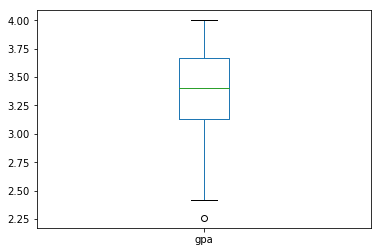

In [8]:
#boxplot 2 
df_amend['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer:
**GRE:**
50% of the scores lie within the range 500-650, with a median around 580. There is a lot of variability in the first and fourth quartiles compared to the second and third quartiles, any outliers were found amongst those obtaining the lowest scores. For GRE it would appear that the median is pretty close tot the mean.

**GPA**
The median appears to be shifted to the right to a gpa around 3.4 with a very big spread of values in the first quartile as opposed to teh second, third and fourth quartiles.

#### Question 8. Describe each distribution 

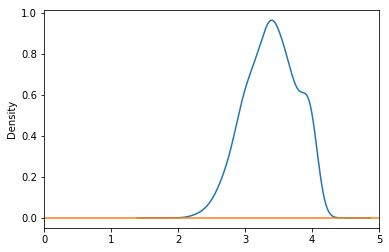

In [9]:
# plot the distribution of each variable 
df_amend['gpa'].plot(kind = 'density',xlim = (0,5))
df_amend['gre'].plot(kind = 'density')

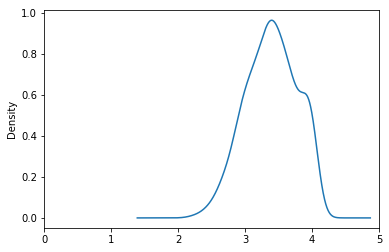

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df_amend['gpa'].plot(kind = 'density',xlim = (0,5))

In [11]:
df_amend.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


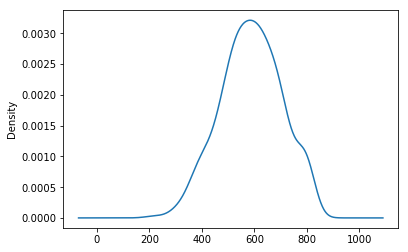

In [12]:
df_amend['gre'].plot(kind = 'density')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7FD208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E152C18>]], dtype=object)

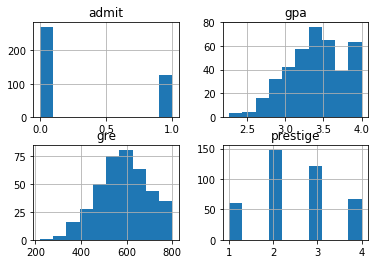

In [13]:
df_amend.hist()

In [14]:
print 'Skewness:'
print 'gre:', df_amend['gre'].skew()
print 'gpa:', df_amend['gpa'].skew()
print 'Kurtosis:'
print 'gre:', df_amend['gre'].kurt()
print 'gpa:', df_amend['gpa'].kurt()

Skewness:
gre: -0.146046988216
gpa: -0.216888932969
Kurtosis:
gre: -0.332864354651
gpa: -0.563569899522


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [16]:
import scipy.stats as stats
stats.normaltest(df_amend['gre'])
stats.normaltest(df_amend['gpa'])

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)

NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)

Answer: gre & gpa are slightly skewed and slightly more peaked than a standard normal but I think would meet the normality requirement. After applying the test for normality, gre can be assumed to be a normal distribution but gpa has a p value <0.05 so does not meet the normality assumption.

In [17]:
# try a w/s test.

def ws_test (w,s):
    return w/s
ws_test(df_amend['gre'].max()-df_amend['gre'].min(),df_amend['gre'].std())

5.0121940036653836

In [21]:
# try jacques barra test
def JB_test(s,k,n):
    test_stat = n*((s**2)/6 +(k**2)/24)
    return test_stat

JB_test(df_amend['gre'].skew(),df_amend['gre'].kurt(),df_amend['gre'].count())

3.2441114648735994

In [22]:
JB_test(df_amend['gpa'].skew(),df_amend['gpa'].kurt(),df_amend['gpa'].count())

8.366349360181367

***Further testing supports the original assumption: gpa is not from a normal distribution.***

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: the gpa scores could be corrected 

#### Question 11. Which of our variables are potentially colinear? 

In [ ]:
# create a correlation matrix for the data


#### Question 12. What did you find?

Answer: 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

#### Question 14. What is your hypothesis? 

Answer: 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data